In [2]:
import pandas as pd 
import numpy as np
import yfinance as yf
from matplotlib import pyplot as plt
from fredapi import Fred
import config
fred = Fred(api_key=config.api_key)


In [3]:
#Get Exchange rate data and energy price data 
# Define the ticker list
tickers_list = ['CLP=X','BZ=F']
# Fetch the data
data = yf.download(tickers_list,'1990-1-1')['Adj Close']
# Print first 5 rows of the data
print(data.head())




[*********************100%***********************]  2 of 2 completed
            BZ=F       CLP=X
Date                        
2003-12-01   NaN  603.530029
2003-12-02   NaN  596.700012
2003-12-03   NaN  594.330017
2003-12-04   NaN  583.719971
2003-12-05   NaN  588.179993


In [17]:
from datetime import datetime


#organize this data into monthly % changes as well
df = data.groupby(pd.PeriodIndex(data.index, freq="M"))[tickers_list].mean()
df.reset_index(inplace=True)
df['Date'] = df['Date'].dt.strftime('%Y/%m/%d')
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].replace(day=1)
df = df.set_index('Date')
df = df[tickers_list].pct_change(1)

df.head()


TypeError: cannot convert the series to <class 'int'>

In [5]:

def fredget(varlist, start_date, end_date, plots=True,freq="",name_map = dict()):
    df_collect = pd.DataFrame()

    for var in varlist:
        df_add = fred.get_series(var, observation_start = start_date, observation_end=end_date, frequency =freq).to_frame(name = var)
        info_add = fred.get_series_info(var).to_frame(name = var)
        print(var)
        #If user changes the 
        if freq != "":
            info_add.loc['cur_freq', var] = freq
            
        if var in name_map:
            info_add.loc['user_title', var] = name_map[var]
        else:
            info_add.loc['user_title', var] = info_add.loc['title', var]
                    
        if plots == True:
            df_add.plot(y=var, use_index=True, kind='line', title = info_add.loc['user_title', var], ylabel = info_add.loc['units', var] )
            
        if df_collect.empty == True:
            df_collect = df_add
            info_store = info_add
        else:
            df_collect = pd.merge(df_collect, df_add, left_index=True, right_index=True, how='outer')
            info_store = pd.merge(info_store, info_add, left_index=True, right_index=True, how='left')
            
    df_collect.sort_index()
    return df_collect, info_store


CPALTT01CLM657N
CPGREN01CLM657N
CPGRLE01CLM657N


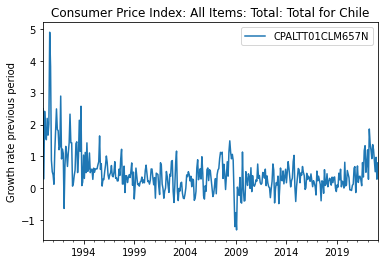

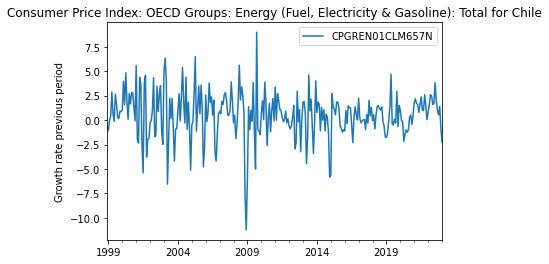

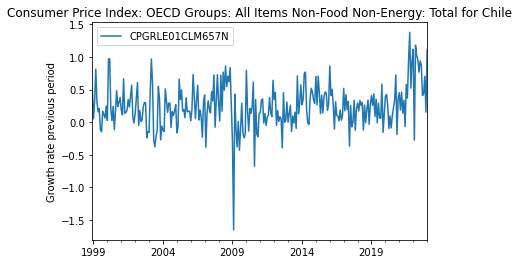

In [6]:
s_d ='1990-01-01'
e_d='2023-01-01'
"""
headline
CPALTT01CLM657N
energy
CPGREN01CLM657N
CORE
CPGRLE01CLM657N
"""

#Define FRED codes to search for 
FRED_list = ['CPALTT01CLM657N','CPGREN01CLM657N','CPGRLE01CLM657N']

#Collect variables into a monthly df and a quarterly df
df_collect_m, dfinfo_m = fredget(FRED_list, s_d, e_d, freq = "m", plots=True)


In [8]:
newdf = df.merge(df_collect_m, how='inner',left_index=True,right_index=True)
